# Average classifier

The purpose of that assignment is to design an average classifier for each class, and classify the images using the distance to each class representation.

# Setup

In [61]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
plt.ion()

root_ds = '.'

## Mounting Google Drive (Google Colab only)
First, we'll mount the distant Google Drive locally. We assume here you have created a shortcut `2020-MSAIMove_computervision_shared` pointing to the class shared folder.

Rather than downloading, distant mounting ensure fast access without need of download.

In [62]:
if 'google.colab' in str(get_ipython()):
  import os
  from google.colab import drive
  drive.mount('/content/drive')
  
#  root_ds = '/content/drive/MyDrive/2021-MSAIMove_computervision_shared/datasets/'
  root_ds = '/content/drive/MyDrive/Colab Notebooks/datasets'
  assert(os.path.exists(root_ds))

#  ! cp /content/drive/MyDrive/2021-MSAIMove_computervision_shared/common/image_tools.py .
#  ! cp /content/drive/MyDrive/2021-MSAIMove_computervision_shared/common/input_tools.py .

#  ! cp '/content/drive/MyDrive/Colab Notebooks/common/image_tools.py' '.'
#  ! cp '/content/drive/MyDrive/Colab Notebooks/common/input_tools.py' '.'
# Cela n'a pas l'air de marcher. Les guillemets améliorent tout de même. 

import sys
sys.path.append(os.path.abspath('/content/drive/MyDrive/Colab Notebooks/common'))



import image_tools, input_tools


if 'google.colab' in str(get_ipython()):
  input_tools.root_path = os.path.join(root_ds)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Classification

First, let's define the function distance, dataset to use and load the later using the python script provided.

In [63]:
db_name = 'cifar-100'  # db1, db2, cifar-100
distance = "L2"  # L1 | L2

# Load the DataBase (frome cifar-100 thanks to the input_tools)
# Return classes as N (class_name), train_data as Nx2 (class_idx, image), test_data as Nx2 (class_idx, image)
classes, train_data, test_data = input_tools.load_db(db_name)

# Useful shortcuts

In [ ]:
from operator import xor
# Examples for accessing some data (just as a reminder)
# train_data = ...
# x = train_data[2]                          # ??? Getting the 3rd image 
# x = train_data[2, 0]                       # Getting the class of the 3rd image (index 2): shape 1
# x = train_data[train_data[:, 0]==2]        # Getting all samples of the 3rd class (index 2): shape nx2 (n the number of samples) 
# x = train_data[train_data[:, 0]==0][1]     # ??? Getting the 5th image (index 4) of the 1st class (index 0): shape HxWx3
# x = train_data[:, 0]                       # Getting all classes: shape n (n the number of samples) 


In [67]:
# Useful shortcuts
# Ctrl + /        comment/uncomment
# Ctrl + d        (when text is selected) select next identical text
# Alt + click     multiple text pointer

# Helpers
if False:
  im1 = train_data[0, 1]
  print("im1 est de dimension:",im1.shape)

  im2 = train_data[1, 1]
  print("im2 est de dimension:",im2.shape)
  print("im2 a pour minimum:",im2.min(),"et pour maximum:", im2.max())

  # Image encoding uint8: [0, 255]  integers
  # Image encoding float: [0., 1.]  float

  plt.figure()
  plt.subplot(2, 2, 1)
  plt.imshow(im1)
  plt.title("im1")

  plt.subplot(2, 2, 2)
  plt.imshow(im2)
  plt.title("im2")

  plt.subplot(2, 2, 3)
  plt.imshow(im1-im2)
  plt.title("im1 - im2")

  plt.subplot(2, 2, 4)

  # Euclidean distance: sum((a-b)**2, axis=2)
  print("L'inverse de im1 est de dimension:", (im1-[1., 1., 1.]).shape)  # (32x32x3) - (3)  => (32x32x3) - (1x1x3)  => (32x32x3)
  plt.imshow(np.linalg.norm(im1-[1., 1., 1.], axis=2))
  plt.title("Inverse de im1")

  # L1 distance of im1 to im2: sum(|a-b|)
  # (32x32x3) => sum(.., axis=0) => (32x3), sum(.., axis=1) => (32), sum(..., axis=0) => (1)
  L1 = np.sum(np.abs(im1-im2))  # (1)


  all_classes = train_data[:, 0]
  # print(np.unique(train_data[:, 0]))
  print("all_classes:", all_classes)
  mask = all_classes == 1
  print("mask:",mask)                  
  mask_count = mask.sum()              
  print("Sum mask =",mask_count)      #2500

  train_data_class_1 = train_data[mask]  
  train_data_class_1_sample5 = train_data[mask][4]
  train_data_class_1_sample5_img = train_data[mask][4, 1]

 # What you would like: (2500, 32, 32, 3)
  print("Stak dim:",np.stack(train_data[train_data[:, 0] == 1, 1]).shape) #(2500, 32, 32, 3)
  # stack : Join a sequence of arrays along a new axis



# Train Classifiers


Now, let's build the classifiers from each class_data, remember the classifier representation is the average of all the class samples.

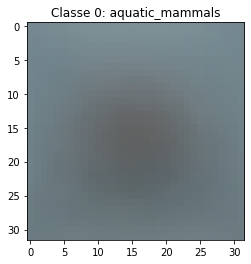

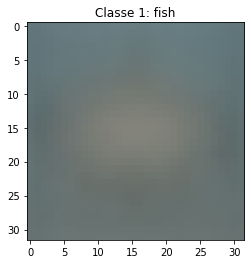

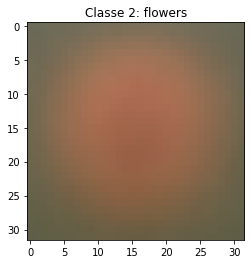

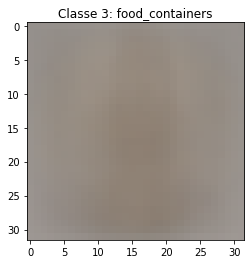

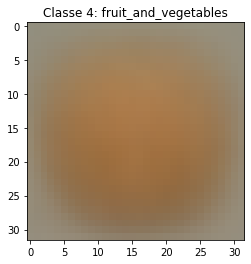

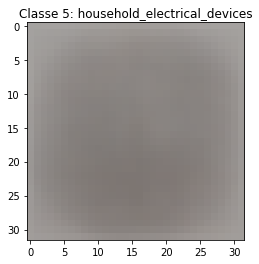

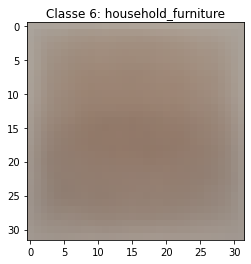

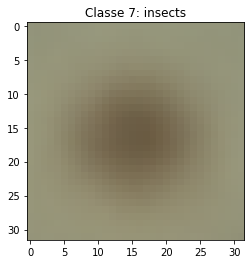

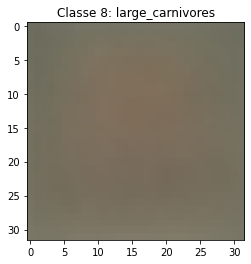

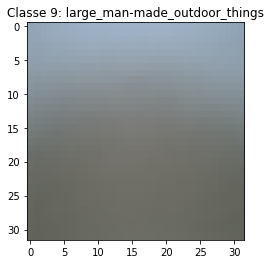

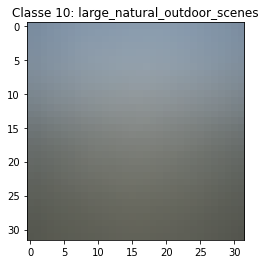

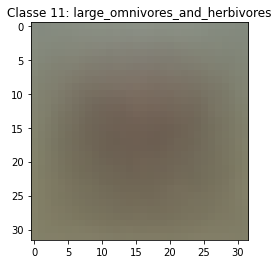

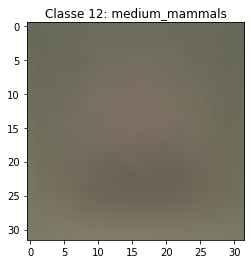

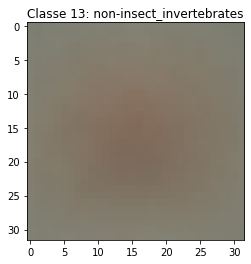

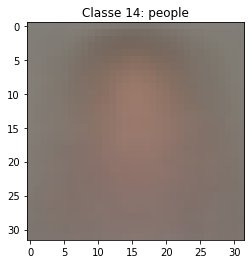

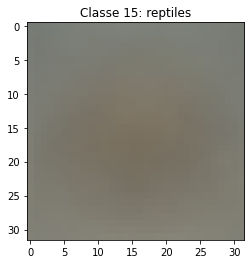

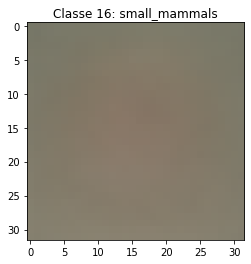

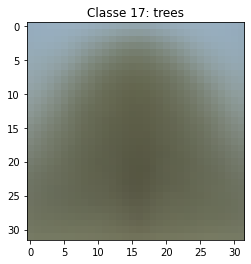

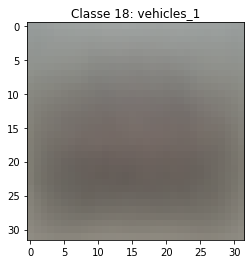

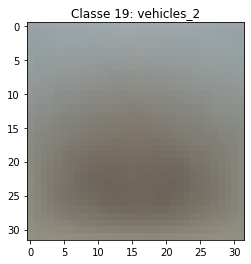

In [68]:
# Train classifiers
classifiers = np.zeros_like(classes, dtype=np.object)
classif_score = 0.

for i, c in enumerate(classes):
    #print("%s" % c)  #Print the number and the name of each class contained into the dataset

    # TODO: Select the train data for classes index i (i.e. the image where class_idx==i)
    class_data = train_data[train_data[:,0]==i]  #Getting all sample of th classe i
    classifiers[i] = np.average(class_data[:,1]) #Compute the average, pixel per pixel of each image from the given class

    # TODO: Show the classifier (uncomment once the classifier is written)
    plt.figure(c)
    plt.imshow(classifiers[i][..., ::-1])
    plt.title('Classe %s: %s'%(i, c))
    plt.draw()
    # plt.waitforbuttonpress()


We now write the code for testing some test samples with the classify function taking as input the list of classifiers, and the q query image.

Test 0 / 100
Test 10 / 100
Test 20 / 100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Test 30 / 100
Test 40 / 100
Test 50 / 100
Test 60 / 100
Test 70 / 100
Test 80 / 100
Test 90 / 100
With L2 distance, the accuracy of the Average Classifier is: 0.11


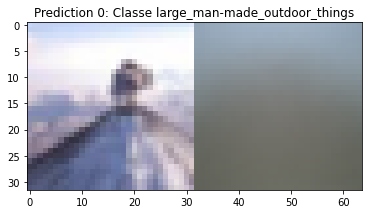

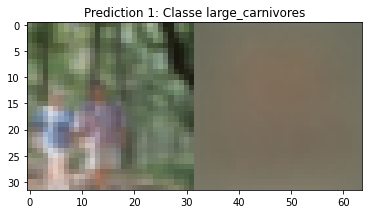

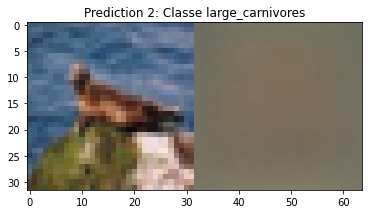

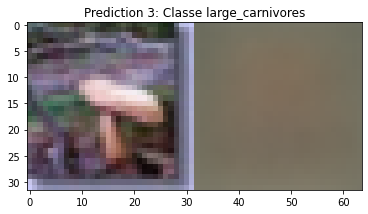

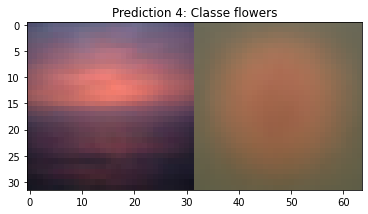

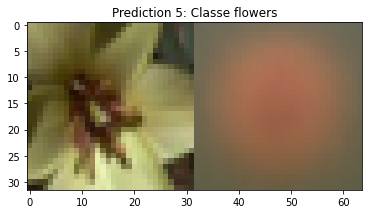

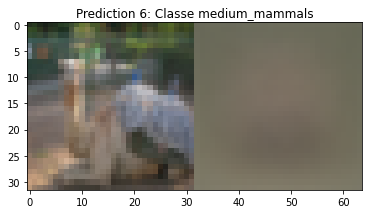

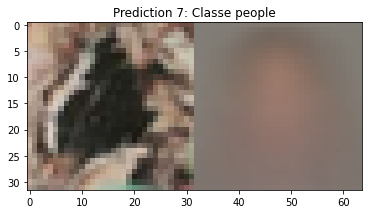

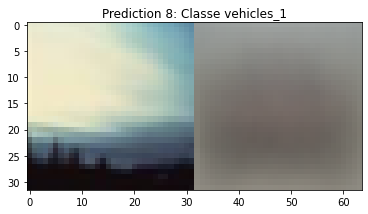

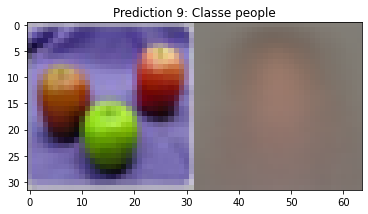

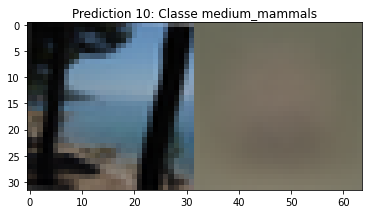

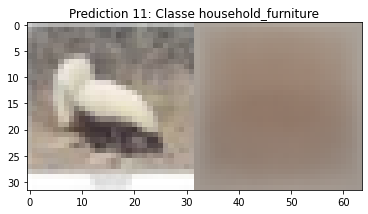

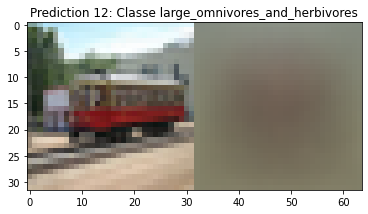

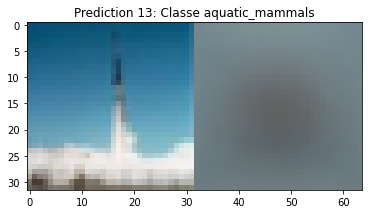

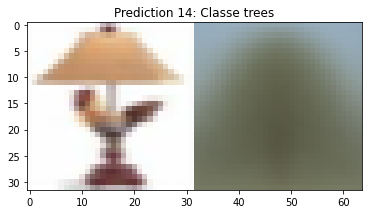

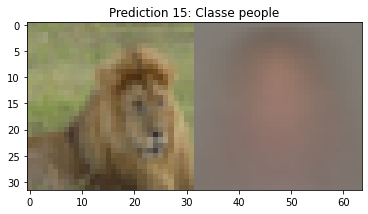

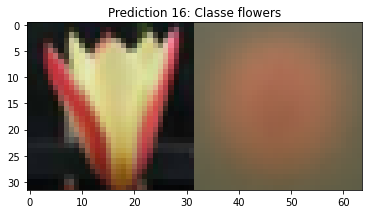

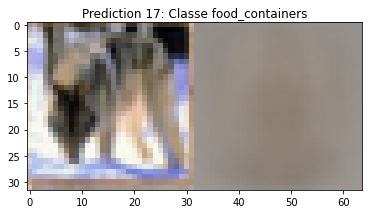

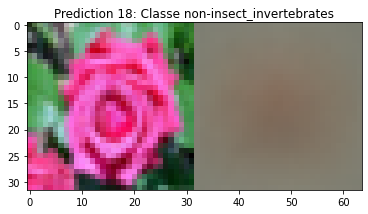

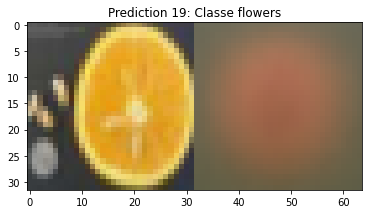

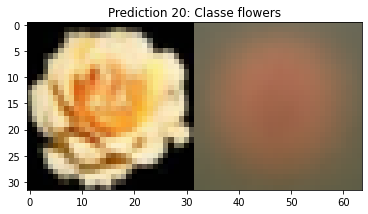

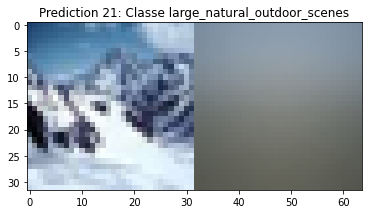

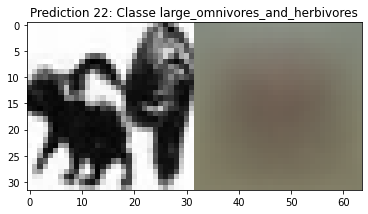

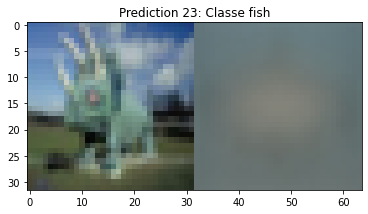

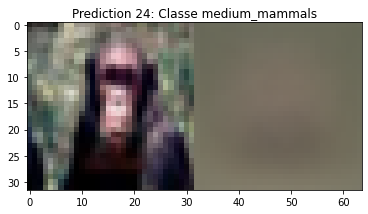

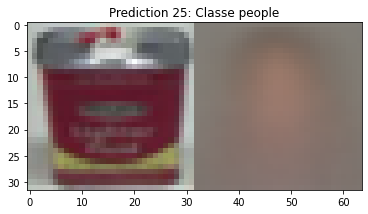

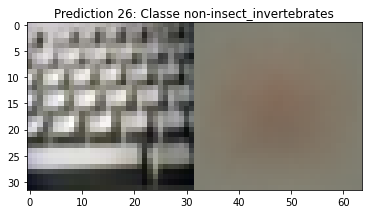

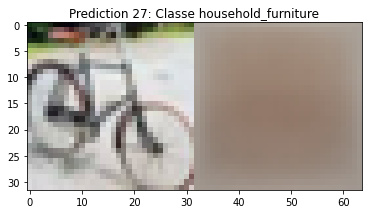

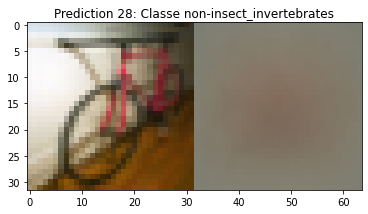

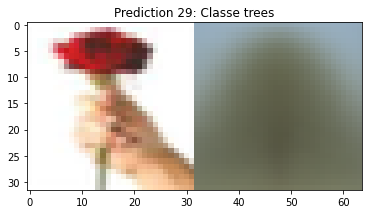

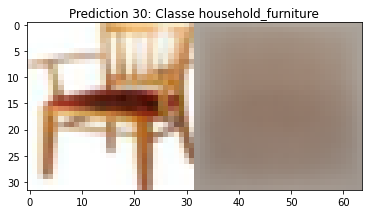

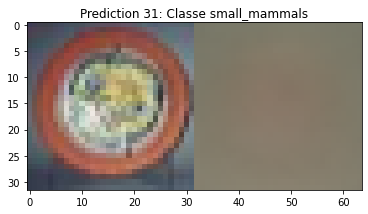

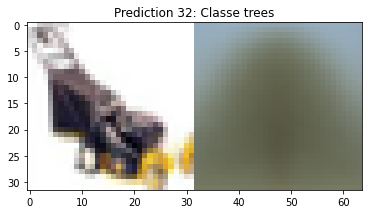

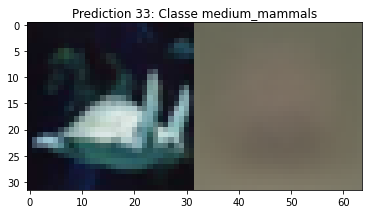

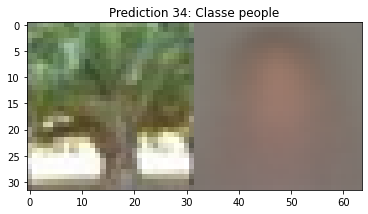

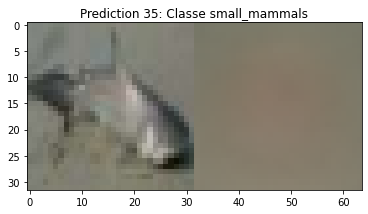

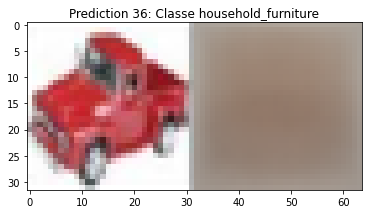

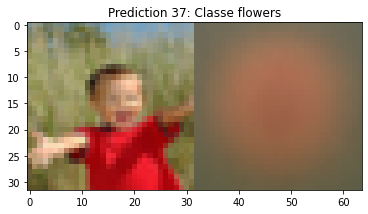

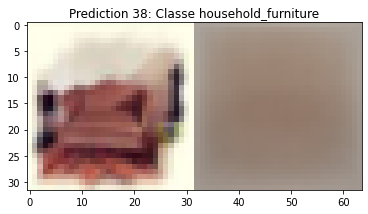

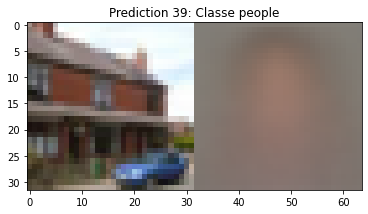

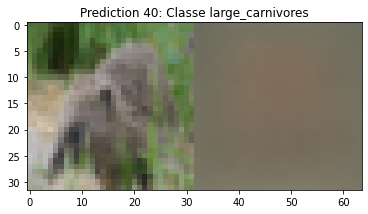

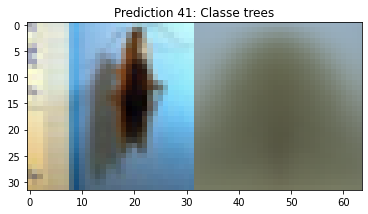

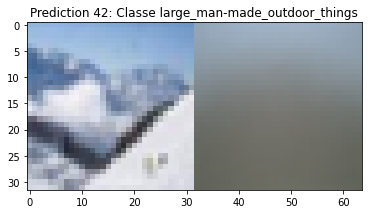

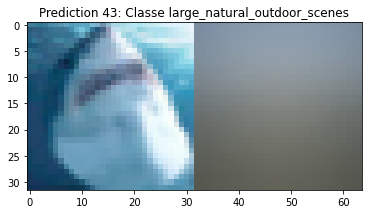

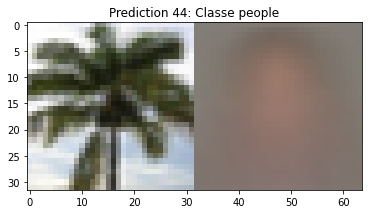

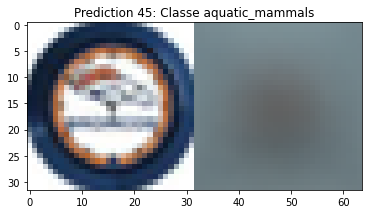

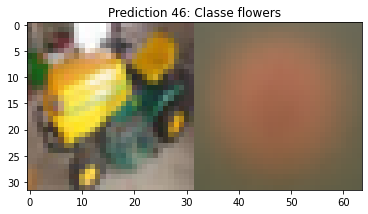

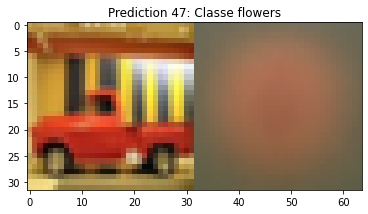

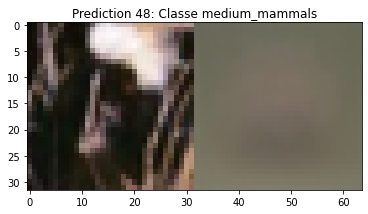

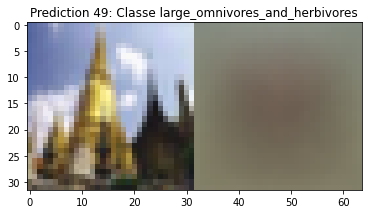

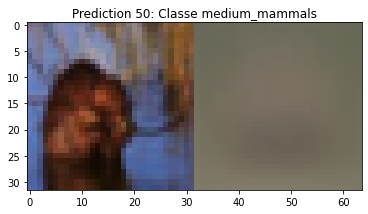

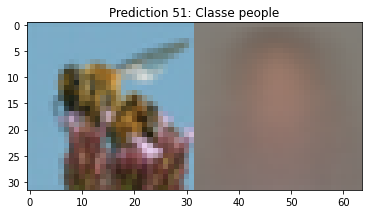

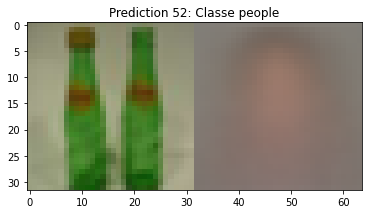

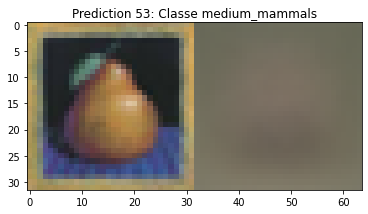

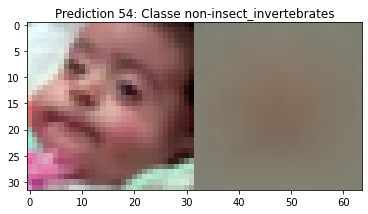

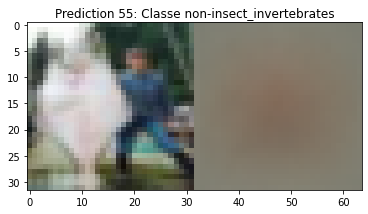

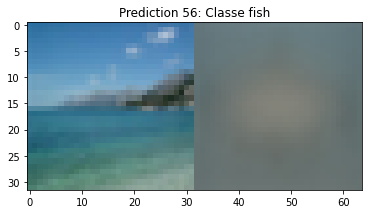

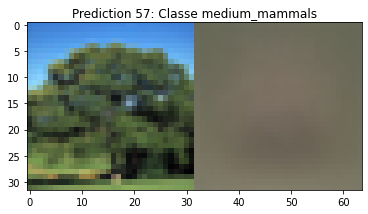

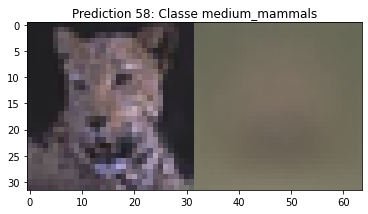

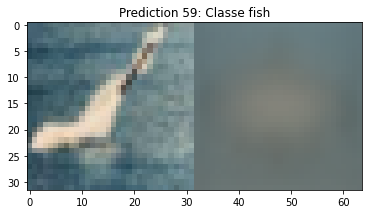

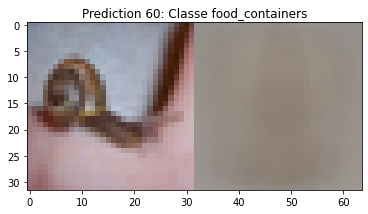

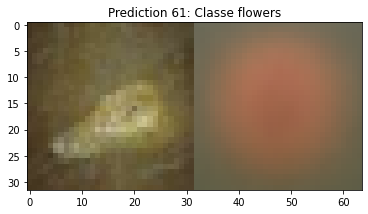

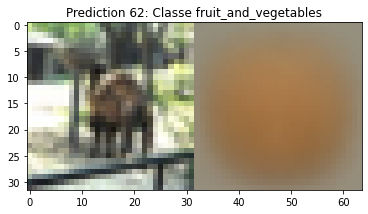

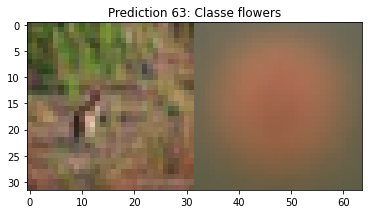

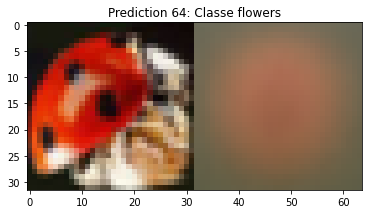

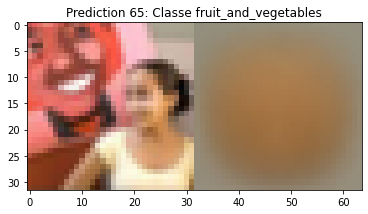

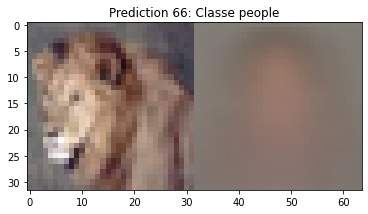

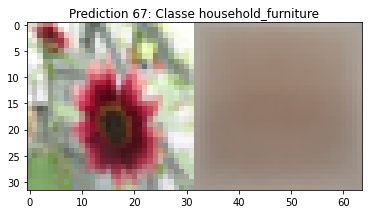

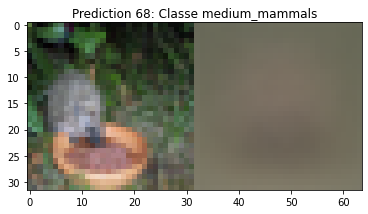

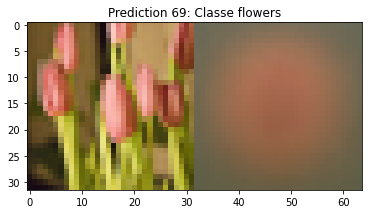

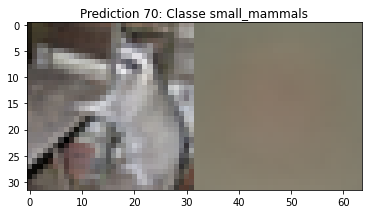

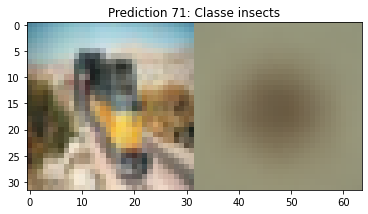

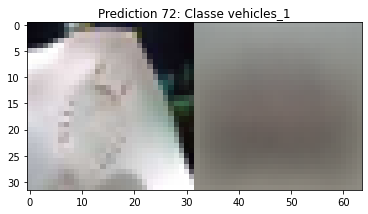

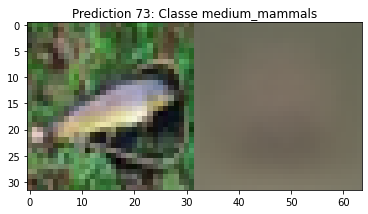

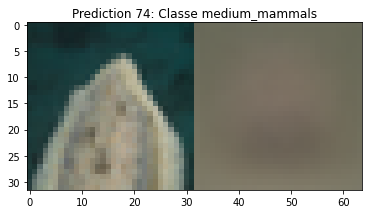

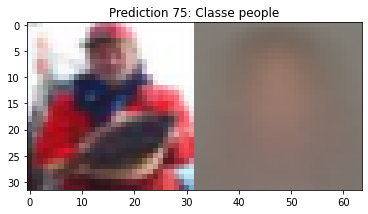

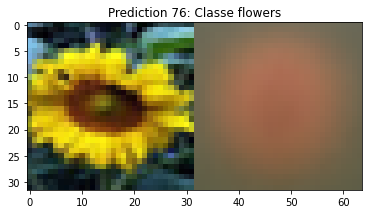

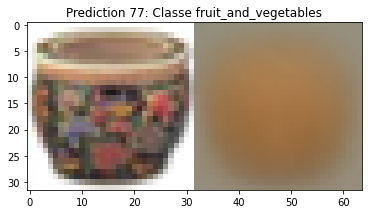

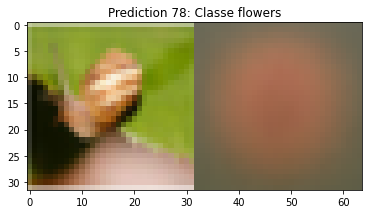

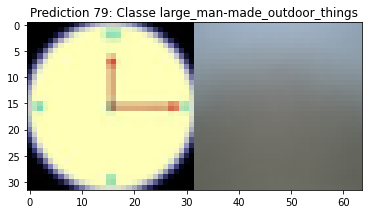

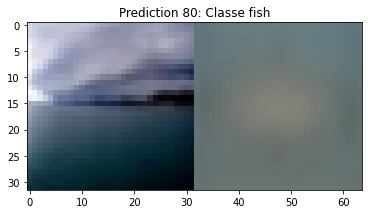

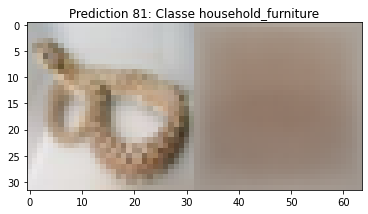

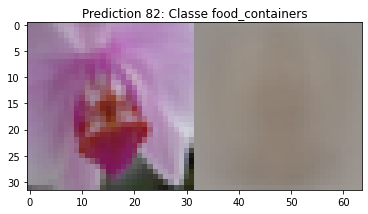

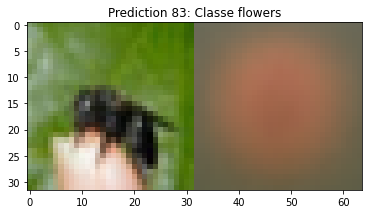

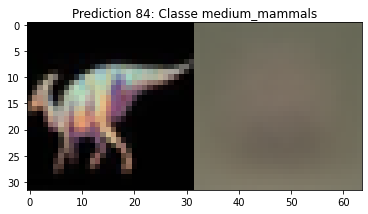

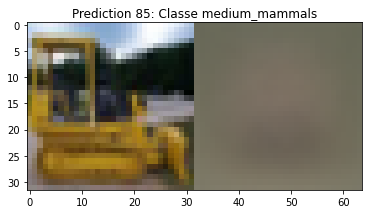

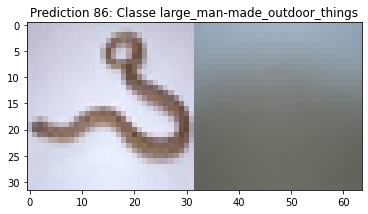

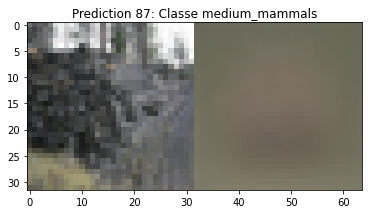

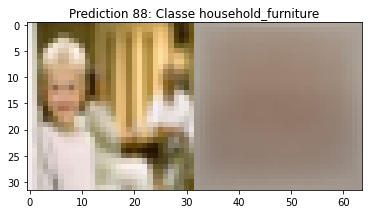

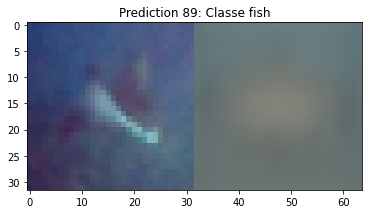

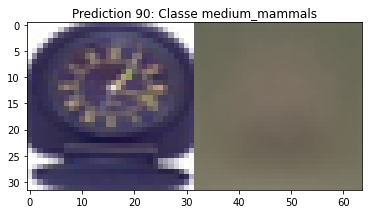

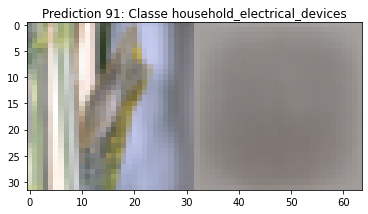

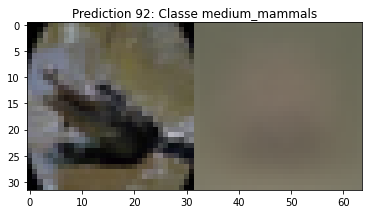

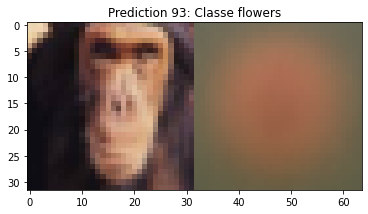

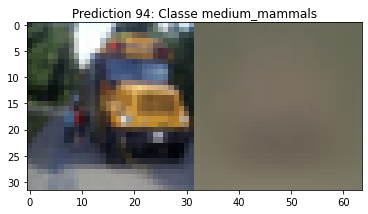

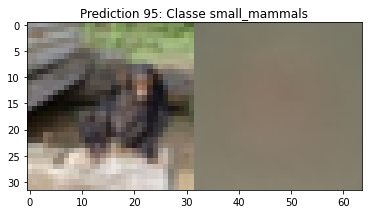

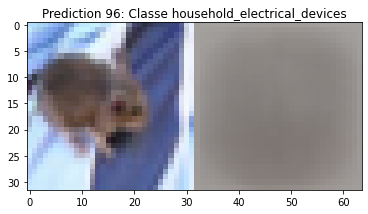

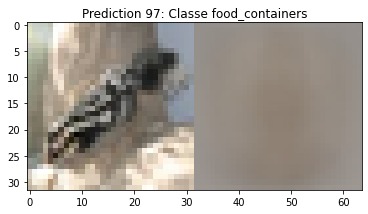

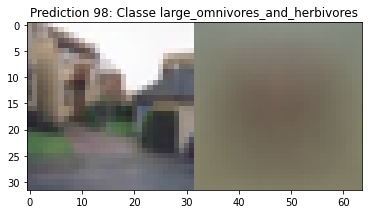

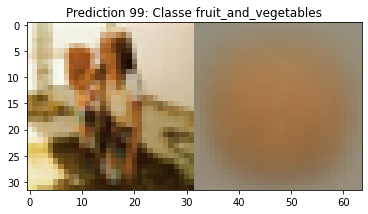

In [75]:
from sklearn.metrics import accuracy_score

def classify(classifiers, q):
    distances = np.zeros(shape=[20,2])
    # Compute Mx2 array of distances for each sample: (class, distance)
    if distance == "L1":
        # TODO: Code the L1 distance between classifiers and q
        for j in range(len(classifiers)):
           distances[j][0] = j
           distances[j][1] = np.sum(np.abs(classifiers[j][1]-q))
 
        pass
    elif distance == "L2":
        # TODO: Code the L2 distance between classifiers and q
        for j in range(len(classifiers)):
          distances[j][0] = j
          distances[j][1] = np.sqrt(np.sum(np.abs(classifiers[j][1]-q)**2))
        pass
    else:
        raise NotImplementedError()

    # Determine the classe
    dist_min = distances[:,1].min()               #Type float64     
    classe = np.where(distances[:,1] == dist_min) # Look for the indice which define the class with the min distance

    # Converting tuple type into ndarray type
    import functools
    classe = functools.reduce(lambda sub, ele: sub * 10 + ele, classe)

    
    # Return the closest class according to the distances array
    return classe 

# Test classifiers
test_data = test_data[:100]  # Select the 100 first
predictions = np.zeros(test_data.shape[0], dtype=np.int)

for i in range(len(test_data)):
  if i % 10 == 0:     #reste de division entière
    print('Test %d / %d' % (i, len(test_data)))

  label, q = test_data[i] #q is the image of dimension (32, 32, 3)


  predictions[i] = classify(classifiers, q)

  plt.figure("Test %d" % i)
  plt.imshow(np.hstack([q, classifiers[predictions[i]]])[..., ::-1])
  plt.title('Prediction %s: Classe %s'%(i, classes[predictions[i]]))
  plt.draw()
  # plt.waitforbuttonpress()

# Convertion from type array to list
test_data_L = test_data[:,0].tolist()
predictions_L = predictions.tolist()

# Compute Accuracy
accuracy = accuracy_score(test_data_L, predictions_L)
print("With %s distance, the accuracy of the Average Classifier is: %s"% (distance, accuracy))


Comment:
At the end of this programming exercise using cifar-100 dataset, we observe that from the calculation of 
the L1 distance the accuracy is 10% while using the L2 distance gives an accuracy of 11%. In sum, this method 
is not efficient for datasets containing many classes.